## Generat inputs for clustering and visualizations

In [17]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.io
from skimage import io
from sklearn.datasets import make_blobs
import pandas as pd

In [22]:
N_SAMPLES = 5
RANDOM_STATE = 42

In [23]:
# Generate some training data from clustering
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[1.0, 1.0, 0.5],
                  centers=[(-5, -5), (0, 0), (5, 5)],
                  random_state=RANDOM_STATE)

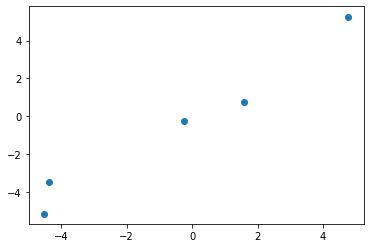

In [24]:
plt.scatter(X[:, 0], X[:, 1])

In [25]:
output = pd.DataFrame(X)

In [27]:
output.to_csv("input.csv", index = False, header = False)